In [1]:
# %load ../uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt

import sys, os, pdb

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
	parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
	sys.path.append(p)

import subprocess
hname = subprocess.check_output('hostname')

if 'ankitnse'.encode() in hname:

	if '%s/uoicorr' % p not in sys.path:
	    sys.path.append('%s/uoicorr' % p)
else:
	# And standard list of subdirectories
	if '%s\\pyuoi' % p not in sys.path:
		sys.path.append('%s\\pyuoi' % p)
	if '%s\\uoicorr' % p not in sys.path:
	    sys.path.append('%s\\uoicorr' % p)

from postprocess import postprocess_file, postprocess_dir

In [2]:
from utils import gen_covariance, gen_beta, gen_data

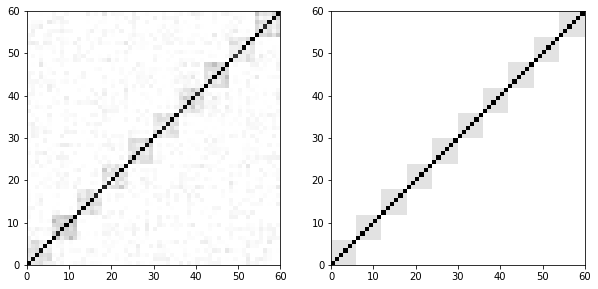

In [9]:
# How large of a dataset do we need to generate before the empirical correlation matrix becomes reliable?
n = 300
p = 60
block_size = 6
sigma = gen_covariance('block', n_features = p, block_size = block_size,correlation=0.2)
beta = gen_beta(p, block_size = block_size)
X, X_test, y, y_test = gen_data(n, p, 0.3, sigma, beta)
empirical_cov = 1/n * X.T @ X
fig, ax = plt.subplots(1, 2, figsize = (10, 10))
ax[0].pcolor(empirical_cov, vmin = 0, vmax = 1, cmap = 'Greys')
ax[0].set_aspect('equal')
ax[1].pcolor(sigma,  vmin = 0, vmax = 1, cmap = 'Greys')
ax[1].set_aspect('equal')

In [10]:
from sklearn.cluster import KMeans